In [13]:
import numpy as np 
import pandas as pd

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import PolynomialFeatures

import matplotlib.pyplot as plt

def load_data(hemisphere):
    X = pd.read_csv('https://raw.githubusercontent.com/JonahKember/hippocampus_clustering/main/' + hemisphere + '_nmf_input_raw.csv')
    X = X.to_numpy()
    return(X)


In [2]:

def reshape_for_clustering(X):
    '''Reshape X into a [Voxel-Subject X Metric] matrix to be used for clustering ([Voxel X Metric], stacked by subject).'''

    # Rescale.
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Define relevant deimensions of data.
    n_metrics = 3
    n_voxels = X.shape[0]
    n_subjects = int(X.shape[1]/n_metrics)

    # Define X_new as a 3-dimensional tensor [Voxels x Subjects X Metric]
    metric_idx = np.arange(0,n_subjects*3,n_subjects)
    metric_idx = np.append(metric_idx, n_subjects*3)
    X_new = np.split(X,metric_idx, axis = 1)

    # Create X_stacked for use in clustering.
    X_stacked = X_new[1].reshape([n_voxels*n_subjects])

    for i in range(2,n_metrics + 1):
        X_stacked = np.vstack([X_stacked,X_new[i].reshape([n_voxels*n_subjects])])

    X_stacked = X_stacked.transpose()

    poly_transform = PolynomialFeatures(degree = 2)
    X_stacked = poly_transform.fit_transform(X_stacked)

    return(X_stacked)


In [16]:
X = load_data('right')
X = reshape_for_clustering(X)

model = GaussianMixture(n_components=5, covariance_type='full', tol=0.001, reg_covar=1e-06, max_iter=100, n_init=1, init_params='kmeans')
model.fit(X)

clusters = model.predict(X)


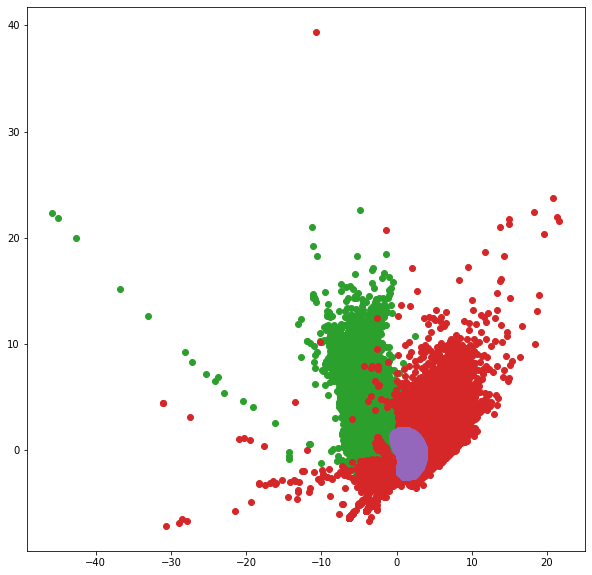

In [17]:
model = LinearDiscriminantAnalysis()
X_ld = model.fit_transform(X,clusters)
    

fig, ax = plt.subplots(1,figsize = [10,10])
for k in range(6):
    ax.plot(X_ld[clusters == k,0], X_ld[clusters == k,1], marker='o', linestyle='')    



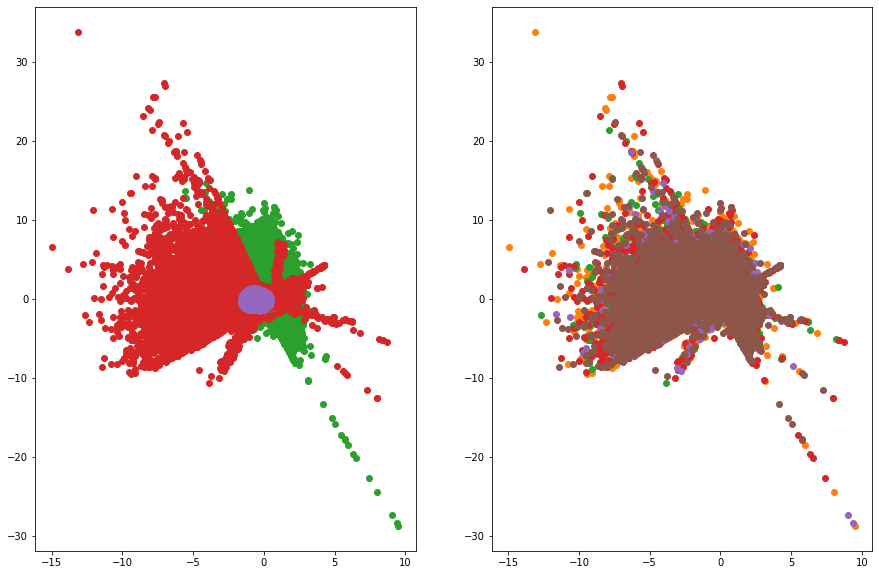

In [19]:
X = load_data('right')
y = pd.read_csv('right_subfield_labels.csv')
y = y.to_numpy()
y = y.reshape(y.shape[0],)
n_subjects = int(X.shape[1]/3) 
y = np.tile(y,n_subjects)

X = reshape_for_clustering(X)

model = LinearDiscriminantAnalysis()
X_ld = model.fit_transform(X,y)

fig, ax = plt.subplots(1,2,figsize = [15,10])
for k in range(6):
    ax[0].plot(X_ld[clusters == k,0], X_ld[clusters == k,1], marker='o', linestyle='')    
    ax[1].plot(X_ld[y == k,0], X_ld[y == k,1], marker='o', linestyle='')    




In [9]:
from sklearn.mixture import GaussianMixture
from sklearn.manifold import SpectralEmbedding

X = load_data('right')
X = reshape_for_clustering(X)

transform = SpectralEmbedding(n_components=2)
X = transform.fit_transform(X)

# print('Running GMM...')
# model = GaussianMixture(n_components=5, covariance_type='full', tol=0.001, reg_covar=1e-06, max_iter=100, n_init=1, init_params='kmeans')

# model.fit(X)
# print(model.means_)

# clusters = model.predict(X)


# import matplotlib.pyplot as plt

# fig, ax = plt.subplots(1,2,figsize = [15,5])

# for k in range(np.max(clusters)):
#     ax[0].plot(X[clusters == k,0], X[clusters == k,1], marker='o', linestyle='')    

# for nmf_comp in range(np.max(clusters)):
#     ax[1].plot(X[y == k,0], X[y == k,1], marker='o', linestyle='')    



MemoryError: Unable to allocate 367. GiB for an array with shape (701520, 70152) and data type float64

In [23]:
y = pd.read_csv('right_subfield_labels.csv')
y = y.to_numpy()
y = y.reshape(y.shape[0],)

X = load_data('right')
n_subjects = int(X.shape[1]/3) 

y = np.repeat(y,n_subjects)



from sklearn.metrics import rand_score


print(rand_score(y,clusters))




0.6358784323832575
